## 2021-09-23: Approximations of Continuous Probability Distributions

*Last Updated*: 2021-09-23

### Authors
* Kevin Chu (kevin@velexi.com)

### Overview
In this Jupyter notebook, we explore the numerical differences between different discrete approximations of continuous probability distributions. Experiments are performed for the following continuous probability distributions:

* Gaussian

* log-normal

### User Parameters

* `N_values`: list of `N` values to generate approximate probability distributions for

### Notes

* The discretization points are located at the centers of a uniform grid approximation of the continuous random variable.

In [1]:
# --- User Parameters

N_values = [5, 10, 50, 100, 500, 1000, 5000, 10000, 50000, 1000000]

In [2]:
# --- Imports

# Standard library
import math
from math import exp, log

# External packages
import numpy as np
from scipy import stats

# matplotlib
%matplotlib inline
import matplotlib.pyplot as plt

In [3]:
# --- matplotlib Configuration

plt.rcParams['figure.figsize'] = [12, 6]

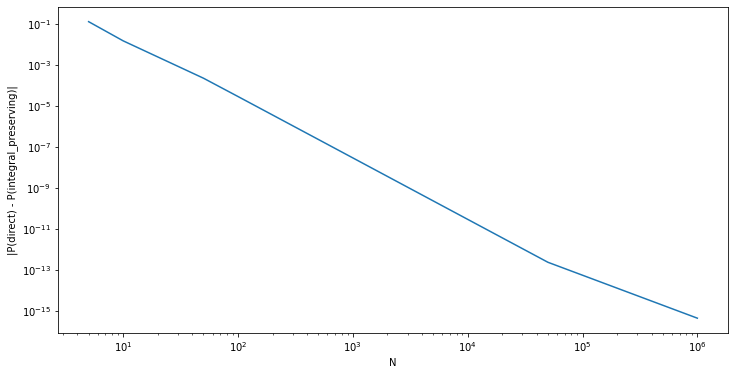

In [4]:
# --- Gaussian distribution

# Parameters
mu = 0
sigma = 1

# Preparations
lower = mu - 6*sigma
upper = mu + 6*sigma

P_diff = np.zeros(len(N_values))

# Generate discrete approximations to probability distribution
for i, N in enumerate(N_values):
    # Generate uniform grid on `x`
    x_edges, dx = np.linspace(lower, upper, N+1, retstep=True)
    x = 0.5 * (x_edges[0:-1] + x_edges[1:])

    # Approximate probability values at `x` values directly from PDF
    #
    # Note: for a uniform grid, there is no need to multiply the PDF by `dx` to estimate
    #       the probability that `x` lies within the interval because the `dx` cancels out
    P_direct = stats.norm.pdf(x, loc=mu, scale=sigma)
    P_direct /= sum(P_direct)

    # Approximate probability values at `x` values as proportional to
    # (integral of PDF over interval)
    cdf = stats.norm.cdf(x_edges, loc=mu, scale=sigma)
    P_integral_preserving = cdf[1:] - cdf[0:-1]
    P_integral_preserving /= sum(P_integral_preserving)

    # Compute difference
    P_diff[i] = max(abs(P_integral_preserving - P_direct))
    
# Plot errors
fig, ax = plt.subplots()
ax.loglog(N_values, P_diff)
ax.set_ylabel('|P(direct) - P(integral_preserving)|')
ax.set_xlabel('N')
plt.show()  # suppresses matplotlib output

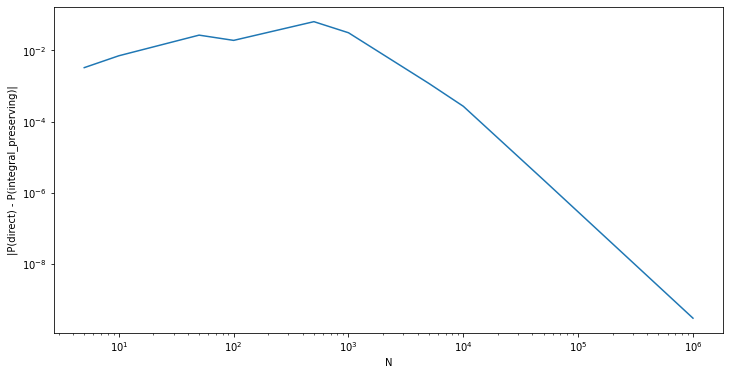

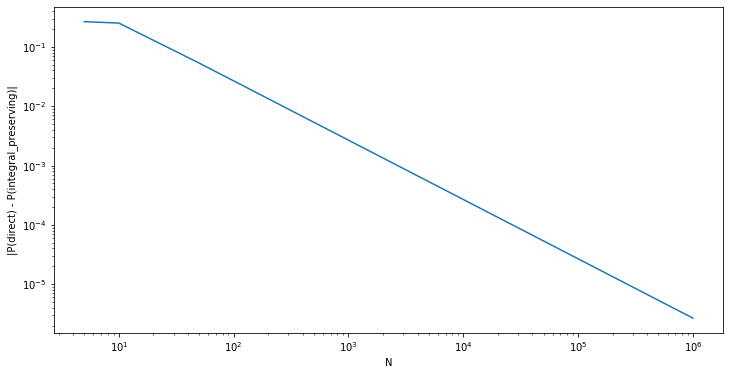

In [5]:
# --- log-normal distribution

# Parameters
mu = 0
sigma = 1

# Preparations
lower = exp(mu - 6*sigma)
upper = exp(mu + 6*sigma)

P_diff = np.zeros(len(N_values))

# ------ Generate discrete approximations to probability distribution
#        using a uniform grid in `x`

for i, N in enumerate(N_values):
    # Generate uniform grid on `x`
    x_edges, dx = np.linspace(lower, upper, N+1, retstep=True)
    x = 0.5 * (x_edges[0:-1] + x_edges[1:])

    # Approximate probability values at `x` values directly from PDF
    #
    # Note: for a uniform grid, there is no need to multiply the PDF by `dx` to estimate
    #       the probability that `x` lies within the interval because the `dx` cancels out
    P_direct = stats.lognorm.pdf(x, sigma, scale=math.exp(mu))
    P_direct /= sum(P_direct)

    # Approximate probability values at `x` values as proportional to
    # (integral of PDF over interval)
    cdf = stats.lognorm.cdf(x_edges, sigma, scale=math.exp(mu))
    P_integral_preserving = cdf[1:] - cdf[0:-1]
    P_integral_preserving /= sum(P_integral_preserving)

    # Compute difference
    P_diff[i] = max(abs(P_integral_preserving - P_direct))
    
# Plot errors
fig, ax = plt.subplots()
ax.loglog(N_values, P_diff)
ax.set_ylabel('|P(direct) - P(integral_preserving)|')
ax.set_xlabel('N')
plt.show()

# ------ Generate discrete approximations to probability distribution
#        using a uniform grid in `log(x)`

for i, N in enumerate(N_values):
    # Generate uniform grid on `log(x)`
    log_x_edges, d_log_x = np.linspace(log(lower), log(upper), N+1, retstep=True)
    x_edges = np.exp(log_x_edges)

    log_x = 0.5 * (log_x_edges[0:-1] + log_x_edges[1:])
    x = np.exp(log_x)

    # Approximate probability values at `x` values directly from PDF
    #
    # Note: for a uniform grid, there is no need to multiply the PDF by `dx` to estimate
    #       the probability that `x` lies within the interval because the `dx` cancels out
    P_direct = stats.lognorm.pdf(x, sigma, scale=exp(mu))
    P_direct /= sum(P_direct)

    # Approximate probability values at `x` values as proportional to
    # (integral of PDF over interval)
    cdf = stats.lognorm.cdf(x_edges, sigma, scale=exp(mu))
    P_integral_preserving = cdf[1:] - cdf[0:-1]
    P_integral_preserving /= sum(P_integral_preserving)

    # Compute difference
    P_diff[i] = max(abs(P_integral_preserving - P_direct))
    
# Plot errors
fig, ax = plt.subplots()
ax.loglog(N_values, P_diff)
ax.set_ylabel('|P(direct) - P(integral_preserving)|')
ax.set_xlabel('N')

plt.show()  # suppresses matplotlib output